In [ ]:
#open google drive

import glob
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
#function for argumentation

import random
import albumentations as A
import numpy as np

from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)

def get_aug(image):
    angle = np.arange(-10,11,1)
    angle0 = random.choice(angle)

    shift = 0.01*np.arange(-10,11,1)
    shift0 = random.choice(shift)

    transform = A.ShiftScaleRotate(shift_limit=shift0,rotate_limit=angle0,scale_limit=0,p=0.5)
    
    augmented_image = transform(image=image)['image']

    transform = A.HorizontalFlip(p=0.5)

    return transform(image=augmented_image)['image']

In [ ]:
#sorting ways to photos in a folder 

def sort_by_index(fname):
    return int(fname.split('.')[0].split('image')[1])

In [ ]:
from tqdm import tqdm
import os
import cv2

dirname = "/gdrive/My Drive/ML_track_test"

#lists for two models (with determined face and without)

Xtest1 = []
Xtest2 = []
Names1 = []
Names2 = []
nums1 = []
nums2 = []

Crop = True
i = 0

kernel = np.ones((3, 3), np.float32) / 9

for fname in tqdm(sorted(os.listdir(dirname), key=sort_by_index)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    i += 1
    if Crop is True:
            img = cv2.resize(img, (640, 640), interpolation = cv2.INTER_AREA)
            #haar cascade
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
            face = face_cascade.detectMultiScale(img)
            for (a, b, w, h) in face:
                cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
                face = img[b:b + h, a:a + w]
    else:
        face = img

    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        #bluring photos to get rid of the noise
        img = cv2.filter2D(img, -1, kernel)
        Xtest1.append(img)
        Names1.append(fname)
        nums1.append(i)
        
    except:
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        img = cv2.filter2D(img, -1, kernel)
        print(f'no face found for {fname}')
        Xtest2.append(img)
        Names2.append(fname)
        nums2.append(i)

  0%|          | 9/2090 [00:02<09:59,  3.47it/s]

no face found for image8.png


  1%|          | 21/2090 [00:06<13:58,  2.47it/s]

no face found for image20.png


  2%|▏         | 32/2090 [00:09<07:20,  4.67it/s]

no face found for image31.png


  2%|▏         | 34/2090 [00:10<07:18,  4.69it/s]

no face found for image32.png


  2%|▏         | 52/2090 [00:14<08:41,  3.91it/s]

no face found for image51.png


  3%|▎         | 56/2090 [00:15<08:53,  3.81it/s]

no face found for image55.png


  4%|▍         | 80/2090 [00:20<06:29,  5.16it/s]

no face found for image78.png


  4%|▍         | 89/2090 [00:22<06:38,  5.02it/s]

no face found for image87.png


  5%|▍         | 96/2090 [00:24<06:11,  5.36it/s]

no face found for image95.png


  5%|▌         | 106/2090 [00:26<07:11,  4.60it/s]

no face found for image105.png


  5%|▌         | 114/2090 [00:28<07:43,  4.26it/s]

no face found for image113.png


  6%|▌         | 115/2090 [00:28<07:58,  4.13it/s]

no face found for image114.png


  7%|▋         | 147/2090 [00:35<07:07,  4.55it/s]

no face found for image146.png


  8%|▊         | 169/2090 [00:40<06:48,  4.70it/s]

no face found for image167.png


  9%|▉         | 192/2090 [00:46<06:21,  4.98it/s]

no face found for image191.png


  9%|▉         | 195/2090 [00:46<06:52,  4.59it/s]

no face found for image194.png


 10%|▉         | 199/2090 [00:47<05:58,  5.28it/s]

no face found for image197.png


 11%|█         | 224/2090 [00:52<06:41,  4.65it/s]

no face found for image223.png


 11%|█         | 232/2090 [00:54<05:57,  5.20it/s]

no face found for image230.png
no face found for image231.png


 11%|█▏        | 239/2090 [00:55<06:08,  5.02it/s]

no face found for image238.png


 12%|█▏        | 244/2090 [00:56<06:10,  4.98it/s]

no face found for image243.png


 12%|█▏        | 254/2090 [00:58<06:14,  4.91it/s]

no face found for image252.png


 13%|█▎        | 262/2090 [01:00<06:12,  4.90it/s]

no face found for image260.png


 13%|█▎        | 264/2090 [01:01<07:01,  4.33it/s]

no face found for image263.png


 13%|█▎        | 279/2090 [01:06<07:47,  3.87it/s]

no face found for image278.png


 13%|█▎        | 282/2090 [01:06<07:13,  4.17it/s]

no face found for image280.png


 14%|█▍        | 292/2090 [01:09<07:27,  4.02it/s]

no face found for image291.png


 14%|█▍        | 300/2090 [01:10<06:16,  4.75it/s]

no face found for image298.png


 15%|█▍        | 307/2090 [01:12<05:42,  5.21it/s]

no face found for image306.png


 15%|█▌        | 317/2090 [01:14<06:25,  4.60it/s]

no face found for image316.png


 16%|█▋        | 341/2090 [01:19<06:23,  4.56it/s]

no face found for image339.png


 17%|█▋        | 347/2090 [01:21<06:00,  4.83it/s]

no face found for image345.png


 17%|█▋        | 365/2090 [01:24<06:33,  4.39it/s]

no face found for image363.png


 18%|█▊        | 369/2090 [01:25<05:44,  5.00it/s]

no face found for image368.png


 18%|█▊        | 379/2090 [01:27<05:59,  4.76it/s]

no face found for image378.png


 18%|█▊        | 381/2090 [01:28<06:02,  4.72it/s]

no face found for image380.png


 18%|█▊        | 383/2090 [01:28<06:41,  4.26it/s]

no face found for image382.png


 19%|█▊        | 390/2090 [01:30<05:46,  4.91it/s]

no face found for image389.png


 19%|█▉        | 397/2090 [01:31<05:19,  5.30it/s]

no face found for image395.png
no face found for image396.png


 20%|██        | 420/2090 [01:36<05:54,  4.71it/s]

no face found for image419.png


 22%|██▏       | 455/2090 [01:44<06:32,  4.17it/s]

no face found for image454.png


 24%|██▍       | 506/2090 [01:55<05:56,  4.45it/s]

no face found for image505.png


 25%|██▍       | 521/2090 [01:58<05:22,  4.86it/s]

no face found for image520.png


 26%|██▌       | 540/2090 [02:03<06:15,  4.13it/s]

no face found for image539.png


 26%|██▋       | 552/2090 [02:05<05:27,  4.70it/s]

no face found for image551.png


 27%|██▋       | 556/2090 [02:07<06:56,  3.68it/s]

no face found for image555.png


 27%|██▋       | 566/2090 [02:09<05:35,  4.54it/s]

no face found for image564.png
no face found for image565.png


 27%|██▋       | 568/2090 [02:09<05:09,  4.92it/s]

no face found for image566.png
no face found for image567.png


 27%|██▋       | 571/2090 [02:10<05:26,  4.66it/s]

no face found for image570.png


 28%|██▊       | 578/2090 [02:11<05:29,  4.59it/s]

no face found for image577.png


 28%|██▊       | 583/2090 [02:13<06:00,  4.18it/s]

no face found for image582.png


 28%|██▊       | 589/2090 [02:15<07:03,  3.55it/s]

no face found for image588.png


 29%|██▉       | 616/2090 [02:20<05:16,  4.66it/s]

no face found for image615.png


 30%|███       | 635/2090 [02:24<04:45,  5.10it/s]

no face found for image634.png


 31%|███       | 645/2090 [02:26<04:51,  4.95it/s]

no face found for image643.png


 31%|███       | 653/2090 [02:28<05:47,  4.13it/s]

no face found for image652.png


 32%|███▏      | 669/2090 [02:32<04:48,  4.93it/s]

no face found for image667.png
no face found for image668.png


 33%|███▎      | 690/2090 [02:36<05:21,  4.35it/s]

no face found for image689.png


 34%|███▍      | 716/2090 [02:42<06:03,  3.78it/s]

no face found for image715.png


 35%|███▌      | 736/2090 [02:47<04:45,  4.74it/s]

no face found for image735.png


 36%|███▌      | 751/2090 [02:50<04:23,  5.08it/s]

no face found for image749.png


 36%|███▋      | 760/2090 [02:52<05:34,  3.98it/s]

no face found for image759.png


 37%|███▋      | 778/2090 [02:56<04:29,  4.87it/s]

no face found for image777.png


 38%|███▊      | 804/2090 [03:01<04:38,  4.62it/s]

no face found for image803.png


 39%|███▉      | 810/2090 [03:02<04:10,  5.12it/s]

no face found for image808.png


 39%|███▉      | 812/2090 [03:03<03:55,  5.43it/s]

no face found for image810.png
no face found for image811.png


 40%|████      | 845/2090 [03:10<04:16,  4.85it/s]

no face found for image844.png


 41%|████      | 858/2090 [03:12<04:09,  4.93it/s]

no face found for image856.png


 41%|████      | 860/2090 [03:13<04:26,  4.62it/s]

no face found for image859.png


 41%|████▏     | 863/2090 [03:14<04:38,  4.41it/s]

no face found for image861.png


 42%|████▏     | 873/2090 [03:16<05:00,  4.05it/s]

no face found for image872.png


 42%|████▏     | 874/2090 [03:16<05:03,  4.01it/s]

no face found for image873.png


 42%|████▏     | 875/2090 [03:16<05:01,  4.03it/s]

no face found for image874.png


 43%|████▎     | 890/2090 [03:20<03:52,  5.16it/s]

no face found for image888.png


 43%|████▎     | 902/2090 [03:22<04:33,  4.35it/s]

no face found for image901.png


 44%|████▍     | 922/2090 [03:27<04:23,  4.43it/s]

no face found for image921.png


 44%|████▍     | 924/2090 [03:27<04:16,  4.55it/s]

no face found for image922.png


 45%|████▍     | 937/2090 [03:30<03:47,  5.07it/s]

no face found for image936.png


 45%|████▍     | 938/2090 [03:30<03:53,  4.92it/s]

no face found for image937.png


 46%|████▌     | 955/2090 [03:34<04:16,  4.42it/s]

no face found for image954.png


 46%|████▌     | 964/2090 [03:36<03:31,  5.33it/s]

no face found for image962.png


 47%|████▋     | 977/2090 [03:39<04:14,  4.38it/s]

no face found for image975.png


 47%|████▋     | 981/2090 [03:40<04:12,  4.39it/s]

no face found for image979.png


 47%|████▋     | 985/2090 [03:40<03:40,  5.01it/s]

no face found for image984.png


 48%|████▊     | 997/2090 [03:43<03:58,  4.59it/s]

no face found for image996.png


 48%|████▊     | 1002/2090 [03:44<03:52,  4.67it/s]

no face found for image1001.png


 48%|████▊     | 1010/2090 [03:46<03:16,  5.49it/s]

no face found for image1009.png


 49%|████▊     | 1017/2090 [03:47<02:59,  5.96it/s]

no face found for image1016.png


 49%|████▉     | 1019/2090 [03:47<03:25,  5.21it/s]

no face found for image1018.png


 49%|████▉     | 1024/2090 [03:49<03:46,  4.72it/s]

no face found for image1023.png


 49%|████▉     | 1026/2090 [03:49<04:19,  4.10it/s]

no face found for image1025.png


 49%|████▉     | 1030/2090 [03:50<04:15,  4.14it/s]

no face found for image1029.png


 50%|████▉     | 1041/2090 [03:52<03:50,  4.55it/s]

no face found for image1040.png


 51%|█████     | 1060/2090 [03:57<03:47,  4.53it/s]

no face found for image1058.png


 51%|█████     | 1067/2090 [03:58<03:07,  5.44it/s]

no face found for image1065.png


 52%|█████▏    | 1085/2090 [04:02<03:29,  4.79it/s]

no face found for image1083.png


 53%|█████▎    | 1112/2090 [04:08<04:03,  4.02it/s]

no face found for image1111.png


 53%|█████▎    | 1113/2090 [04:08<03:58,  4.09it/s]

no face found for image1112.png


 54%|█████▍    | 1133/2090 [04:13<03:23,  4.70it/s]

no face found for image1131.png


 55%|█████▍    | 1141/2090 [04:14<02:55,  5.41it/s]

no face found for image1139.png
no face found for image1140.png


 55%|█████▍    | 1143/2090 [04:15<03:23,  4.66it/s]

no face found for image1142.png


 55%|█████▌    | 1151/2090 [04:16<03:26,  4.56it/s]

no face found for image1149.png


 55%|█████▌    | 1158/2090 [04:18<02:52,  5.40it/s]

no face found for image1156.png
no face found for image1157.png


 56%|█████▌    | 1168/2090 [04:20<03:26,  4.46it/s]

no face found for image1167.png


 56%|█████▌    | 1170/2090 [04:20<03:14,  4.74it/s]

no face found for image1168.png


 58%|█████▊    | 1210/2090 [04:29<03:02,  4.83it/s]

no face found for image1209.png


 58%|█████▊    | 1213/2090 [04:29<03:39,  3.99it/s]

no face found for image1212.png


 58%|█████▊    | 1216/2090 [04:30<03:13,  4.52it/s]

no face found for image1214.png


 59%|█████▉    | 1229/2090 [04:33<03:01,  4.75it/s]

no face found for image1227.png


 59%|█████▉    | 1231/2090 [04:34<03:21,  4.27it/s]

no face found for image1229.png


 59%|█████▉    | 1240/2090 [04:35<03:18,  4.28it/s]

no face found for image1239.png


 60%|██████    | 1259/2090 [04:40<03:02,  4.56it/s]

no face found for image1258.png


 61%|██████    | 1269/2090 [04:42<02:52,  4.76it/s]

no face found for image1267.png


 61%|██████    | 1279/2090 [04:44<02:42,  4.99it/s]

no face found for image1277.png


 62%|██████▏   | 1288/2090 [04:46<02:29,  5.38it/s]

no face found for image1287.png


 62%|██████▏   | 1290/2090 [04:46<02:25,  5.50it/s]

no face found for image1288.png


 63%|██████▎   | 1312/2090 [04:50<03:04,  4.23it/s]

no face found for image1311.png


 63%|██████▎   | 1315/2090 [04:51<02:44,  4.70it/s]

no face found for image1313.png


 63%|██████▎   | 1319/2090 [04:52<02:43,  4.71it/s]

no face found for image1318.png


 63%|██████▎   | 1327/2090 [04:54<02:49,  4.51it/s]

no face found for image1325.png
no face found for image1326.png


 64%|██████▍   | 1340/2090 [04:57<02:34,  4.85it/s]

no face found for image1338.png


 65%|██████▌   | 1361/2090 [05:01<02:26,  4.99it/s]

no face found for image1359.png


 65%|██████▌   | 1362/2090 [05:01<02:56,  4.11it/s]

no face found for image1361.png


 66%|██████▌   | 1369/2090 [05:03<02:31,  4.75it/s]

no face found for image1368.png


 68%|██████▊   | 1422/2090 [05:14<02:16,  4.90it/s]

no face found for image1420.png
no face found for image1421.png


 69%|██████▊   | 1435/2090 [05:17<02:09,  5.06it/s]

no face found for image1434.png


 69%|██████▉   | 1440/2090 [05:18<02:18,  4.70it/s]

no face found for image1438.png


 70%|██████▉   | 1461/2090 [05:22<01:57,  5.33it/s]

no face found for image1459.png


 70%|███████   | 1468/2090 [05:24<02:01,  5.11it/s]

no face found for image1466.png


 70%|███████   | 1471/2090 [05:24<01:53,  5.44it/s]

no face found for image1469.png


 70%|███████   | 1472/2090 [05:25<01:46,  5.78it/s]

no face found for image1471.png


 71%|███████   | 1482/2090 [05:27<02:45,  3.66it/s]

no face found for image1481.png


 71%|███████   | 1487/2090 [05:28<02:07,  4.73it/s]

no face found for image1486.png


 71%|███████▏  | 1492/2090 [05:29<02:01,  4.94it/s]

no face found for image1490.png


 72%|███████▏  | 1506/2090 [05:32<02:01,  4.79it/s]

no face found for image1504.png


 73%|███████▎  | 1516/2090 [05:34<01:50,  5.17it/s]

no face found for image1515.png


 73%|███████▎  | 1524/2090 [05:36<01:47,  5.25it/s]

no face found for image1522.png


 73%|███████▎  | 1534/2090 [05:38<02:20,  3.96it/s]

no face found for image1533.png


 74%|███████▍  | 1544/2090 [05:41<01:55,  4.73it/s]

no face found for image1542.png


 74%|███████▍  | 1547/2090 [05:41<01:45,  5.14it/s]

no face found for image1545.png


 74%|███████▍  | 1551/2090 [05:42<01:51,  4.85it/s]

no face found for image1549.png


 74%|███████▍  | 1556/2090 [05:43<01:45,  5.08it/s]

no face found for image1555.png


 75%|███████▌  | 1574/2090 [05:47<02:00,  4.30it/s]

no face found for image1572.png


 76%|███████▌  | 1578/2090 [05:48<01:38,  5.19it/s]

no face found for image1576.png


 76%|███████▌  | 1591/2090 [05:51<01:39,  5.04it/s]

no face found for image1589.png


 76%|███████▋  | 1597/2090 [05:52<01:38,  5.01it/s]

no face found for image1596.png


 77%|███████▋  | 1600/2090 [05:52<01:33,  5.22it/s]

no face found for image1599.png


 77%|███████▋  | 1603/2090 [05:53<01:39,  4.91it/s]

no face found for image1601.png


 77%|███████▋  | 1606/2090 [05:54<01:57,  4.11it/s]

no face found for image1605.png


 77%|███████▋  | 1611/2090 [05:55<01:33,  5.10it/s]

no face found for image1609.png


 80%|███████▉  | 1662/2090 [06:07<02:17,  3.11it/s]

no face found for image1661.png


 81%|████████  | 1685/2090 [06:12<01:22,  4.93it/s]

no face found for image1683.png


 81%|████████  | 1690/2090 [06:13<01:28,  4.53it/s]

no face found for image1689.png


 81%|████████  | 1698/2090 [06:15<01:13,  5.30it/s]

no face found for image1696.png


 82%|████████▏ | 1709/2090 [06:17<01:15,  5.08it/s]

no face found for image1708.png


 82%|████████▏ | 1722/2090 [06:20<01:28,  4.14it/s]

no face found for image1721.png


 82%|████████▏ | 1724/2090 [06:20<01:28,  4.14it/s]

no face found for image1723.png


 83%|████████▎ | 1728/2090 [06:21<01:16,  4.73it/s]

no face found for image1727.png


 83%|████████▎ | 1732/2090 [06:22<01:29,  4.00it/s]

no face found for image1731.png


 84%|████████▍ | 1761/2090 [06:28<01:05,  5.00it/s]

no face found for image1760.png


 84%|████████▍ | 1763/2090 [06:29<01:06,  4.93it/s]

no face found for image1761.png


 85%|████████▍ | 1772/2090 [06:31<01:11,  4.43it/s]

no face found for image1771.png


 85%|████████▌ | 1779/2090 [06:32<01:03,  4.93it/s]

no face found for image1777.png


 86%|████████▌ | 1790/2090 [06:35<01:02,  4.78it/s]

no face found for image1789.png


 86%|████████▋ | 1804/2090 [06:38<00:55,  5.17it/s]

no face found for image1803.png


 87%|████████▋ | 1818/2090 [06:41<01:01,  4.45it/s]

no face found for image1817.png


 87%|████████▋ | 1827/2090 [06:43<00:56,  4.66it/s]

no face found for image1826.png


 88%|████████▊ | 1837/2090 [06:45<00:50,  5.02it/s]

no face found for image1836.png


 88%|████████▊ | 1843/2090 [06:46<00:55,  4.49it/s]

no face found for image1842.png


 88%|████████▊ | 1848/2090 [06:47<00:43,  5.52it/s]

no face found for image1847.png


 89%|████████▊ | 1850/2090 [06:48<00:45,  5.27it/s]

no face found for image1848.png


 89%|████████▊ | 1852/2090 [06:48<00:53,  4.47it/s]

no face found for image1851.png


 89%|████████▉ | 1869/2090 [06:52<00:43,  5.08it/s]

no face found for image1867.png


 90%|████████▉ | 1876/2090 [06:53<00:42,  5.04it/s]

no face found for image1874.png


 90%|████████▉ | 1880/2090 [06:54<00:41,  5.01it/s]

no face found for image1879.png


 90%|█████████ | 1891/2090 [06:57<00:45,  4.36it/s]

no face found for image1890.png


 91%|█████████ | 1899/2090 [06:58<00:34,  5.53it/s]

no face found for image1897.png


 91%|█████████ | 1901/2090 [06:59<00:37,  5.07it/s]

no face found for image1900.png


 92%|█████████▏| 1921/2090 [07:03<00:30,  5.50it/s]

no face found for image1919.png
no face found for image1920.png


 92%|█████████▏| 1929/2090 [07:05<00:34,  4.66it/s]

no face found for image1927.png


 93%|█████████▎| 1934/2090 [07:06<00:33,  4.64it/s]

no face found for image1932.png


 93%|█████████▎| 1947/2090 [07:09<00:26,  5.45it/s]

no face found for image1945.png


 94%|█████████▍| 1960/2090 [07:12<00:28,  4.63it/s]

no face found for image1958.png


 94%|█████████▍| 1968/2090 [07:13<00:23,  5.30it/s]

no face found for image1966.png


 95%|█████████▍| 1979/2090 [07:16<00:22,  4.99it/s]

no face found for image1977.png


 95%|█████████▍| 1981/2090 [07:16<00:21,  4.97it/s]

no face found for image1979.png


 95%|█████████▌| 1990/2090 [07:18<00:18,  5.39it/s]

no face found for image1989.png


 96%|█████████▌| 1999/2090 [07:20<00:17,  5.19it/s]

no face found for image1997.png
no face found for image1998.png


 96%|█████████▌| 2005/2090 [07:21<00:15,  5.57it/s]

no face found for image2003.png


 96%|█████████▌| 2011/2090 [07:22<00:16,  4.84it/s]

no face found for image2010.png


 98%|█████████▊| 2041/2090 [07:29<00:10,  4.69it/s]

no face found for image2040.png


 98%|█████████▊| 2047/2090 [07:30<00:08,  4.95it/s]

no face found for image2046.png


 98%|█████████▊| 2050/2090 [07:31<00:08,  4.90it/s]

no face found for image2049.png


 98%|█████████▊| 2053/2090 [07:32<00:08,  4.60it/s]

no face found for image2051.png


 99%|█████████▊| 2061/2090 [07:33<00:07,  4.03it/s]

no face found for image2060.png


 99%|█████████▉| 2069/2090 [07:35<00:04,  4.80it/s]

no face found for image2068.png


100%|██████████| 2090/2090 [07:40<00:00,  4.54it/s]


In [ ]:
len(Xtest2), len(Names2)

(208, 208)

In [ ]:
len(Xtest1), len(Names1)

(1882, 1882)

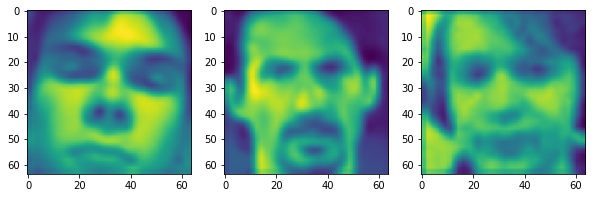

In [ ]:
#photo with determined face

import matplotlib.pyplot as plt
fig, axx = plt.subplots(1, 3, figsize=(10, 5))

for i in range(0, 3):
    img = Xtest1[i]
    axx[i].imshow(img)

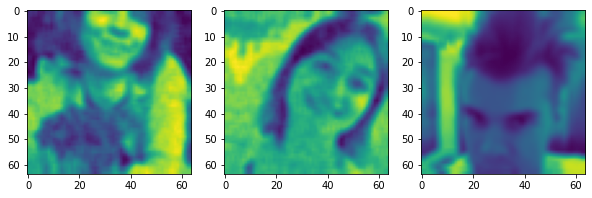

In [ ]:
#photo without determined face

import matplotlib.pyplot as plt
fig, axx = plt.subplots(1, 3, figsize=(10, 5))

for i in range(0, 3):
    img = Xtest2[i]
    axx[i].imshow(img)

In [ ]:
from tqdm import tqdm
import os
import cv2

dirname = "/gdrive/My Drive/ML_track_train"

Xtrain1, ytrain1 = [], []
Xtrain2, ytrain2 = [], []

Crop = True
kernel = np.ones((3, 3), np.float32) / 9
for fname in tqdm(os.listdir(dirname)):
    img = cv2.imread(os.path.join(dirname, fname), cv2.IMREAD_GRAYSCALE)
    label = int(fname.split('label')[1].split('.png')[0])
    if Crop is True:
            img = cv2.resize(img, (640, 640), interpolation = cv2.INTER_AREA)
        
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
            face = face_cascade.detectMultiScale(img)
            for (a, b, w, h) in face:
                cv2.rectangle(img, (a, b), (a+w, b+h), (0, 0, 255), 2)
                face = img[b:b + h, a:a + w]
    else:
        face = img


    try:
        h, w = face.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = face[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        #img = cv2.filter2D(img, -1, kernel)
        Xtrain1.append(img)
        ytrain1.append(label)
    except:
        h, w = img.shape
        size = min(h, w)
        h0 = int((h - size) / 2)
        w0 = int((w - size) / 2)
        
        img = img[h0: h0 + size, w0: w0 + size]
        img = cv2.resize(img, (64, 64), interpolation = cv2.INTER_AREA)
        #img = cv2.filter2D(img, -1, kernel)
        Xtrain2.append(img)
        ytrain2.append(label)
        print("no face")

  4%|▍         | 13/313 [00:02<01:14,  4.04it/s]

no face


  5%|▌         | 16/313 [00:03<01:05,  4.50it/s]

no face


  8%|▊         | 25/313 [00:05<00:55,  5.15it/s]

no face


 14%|█▎        | 43/313 [00:09<00:58,  4.59it/s]

no face


 19%|█▉        | 60/313 [00:12<00:48,  5.23it/s]

no face


 33%|███▎      | 102/313 [00:22<00:40,  5.16it/s]

no face


 38%|███▊      | 119/313 [00:26<00:37,  5.16it/s]

no face


 38%|███▊      | 120/313 [00:26<00:41,  4.62it/s]

no face


 42%|████▏     | 132/313 [00:29<00:38,  4.74it/s]

no face


 44%|████▍     | 137/313 [00:30<00:39,  4.43it/s]

no face


 46%|████▌     | 144/313 [00:31<00:33,  5.12it/s]

no face


 46%|████▋     | 145/313 [00:32<00:34,  4.83it/s]

no face


 51%|█████     | 160/313 [00:35<00:30,  4.99it/s]

no face


 53%|█████▎    | 165/313 [00:36<00:31,  4.74it/s]

no face


 59%|█████▉    | 186/313 [00:40<00:25,  4.89it/s]

no face


 69%|██████▊   | 215/313 [00:46<00:20,  4.77it/s]

no face


 69%|██████▉   | 216/313 [00:46<00:20,  4.78it/s]

no face


 71%|███████   | 223/313 [00:48<00:22,  4.06it/s]

no face


 85%|████████▍ | 266/313 [00:58<00:09,  5.21it/s]

no face


 93%|█████████▎| 291/313 [01:03<00:04,  4.59it/s]

no face


 95%|█████████▍| 296/313 [01:04<00:03,  4.55it/s]

no face


100%|█████████▉| 312/313 [01:07<00:00,  5.02it/s]

no face


100%|██████████| 313/313 [01:07<00:00,  4.63it/s]


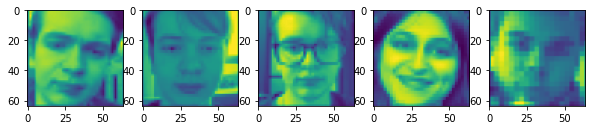

In [ ]:
#photo with determined face

import matplotlib.pyplot as plt
fig, axx = plt.subplots(1, 5, figsize=(10, 5))

for i in range(0, 5):
    img = Xtrain1[i]
    axx[i].imshow(img)

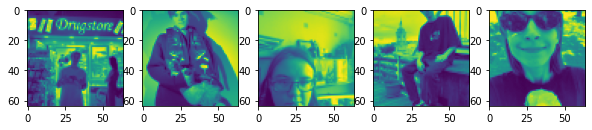

In [ ]:
#photo without determined face

import matplotlib.pyplot as plt
fig, axx = plt.subplots(1, 5, figsize=(10, 5))

for i in range(0, 5):
    img = Xtrain2[i]
    axx[i].imshow(img)

In [ ]:
len(Xtrain1), len(ytrain1)

(291, 291)

In [ ]:
len(Xtrain2), len(ytrain2)

(22, 22)

In [ ]:
#the argumentation process

XtrainAug1, ytrainAug1 = [], []
XtrainAug2, ytrainAug2 = [], []

for (a,b) in zip(Xtrain1, ytrain1):
    for i in range(3):
      XtrainAug1.append(get_aug(a))
      ytrainAug1.append(b)
for (a,b) in zip(Xtrain2, ytrain2):
    for i in range(3):
      XtrainAug2.append(get_aug(a))
      ytrainAug2.append(b)

In [ ]:
len(XtrainAug1), len(ytrainAug1)

(939, 939)

In [ ]:
len(XtrainAug2), len(ytrainAug2)

(63, 63)

In [ ]:
XtrainAug1 = np.asarray([el.ravel() for el in XtrainAug1])
Xtest1 = np.asarray([el.ravel() for el in Xtest1])
XtrainAug2 = np.asarray([el.ravel() for el in XtrainAug2])
Xtest2 = np.asarray([el.ravel() for el in Xtest2])

In [ ]:
#pca for model without determined face

from sklearn.svm import SVC
from sklearn.decomposition import PCA, KernelPCA #Principal Components Analysis
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pca = KernelPCA(n_components = 200, kernel='poly', random_state=42)
model_lr = LogisticRegression()

model2 = make_pipeline(pca, model_lr)

model2.fit(Xtrain2, ytrain2)

prediction2 = model2.predict(Xtest2)

In [ ]:
#svc with kernel rbf for model with determined face

from sklearn.svm import SVC

XtrainAug1 = np.asarray([el.ravel() for el in XtrainAug1])
model1 = SVC(kernel = 'rbf')
model1.fit(XtrainAug1, ytrainAug1)

prediction1 = model1.predict(Xtest1)

In [ ]:
import pandas as pd

pred_df1 = pd.DataFrame(list(zip(Names1, prediction1)), columns = ['img_name', 'pred_class'])
pred_df1.head()

,img_name,pred_class
0,image0.png,2
1,image1.png,3
2,image2.png,4
3,image3.png,4
4,image4.png,0


In [ ]:
pred_df1.insert(0, "nums", nums1)
pred_df1.head()

,nums,img_name,pred_class
0,1,image0.png,2
1,2,image1.png,3
2,3,image2.png,4
3,4,image3.png,4
4,5,image4.png,0


In [ ]:
pred_df2 = pd.DataFrame(list(zip(Names2, prediction2)), columns = ['img_name', 'pred_class'])
pred_df2.head()

,img_name,pred_class
0,image8.png,0
1,image20.png,7
2,image31.png,6
3,image32.png,6
4,image51.png,6


In [ ]:
pred_df2.iloc[15]

img_name      image194.png
pred_class               0
Name: 15, dtype: object

In [ ]:
pred_df2.insert(0, "nums", nums2)
pred_df2.head()

,nums,img_name,pred_class
0,9,image8.png,0
1,21,image20.png,7
2,32,image31.png,6
3,33,image32.png,6
4,52,image51.png,6


In [ ]:
pred = pd.concat([pred_df1, pred_df2], ignore_index=True, axis = 0)
pred.head()

,nums,img_name,pred_class
0,1,image0.png,2
1,2,image1.png,3
2,3,image2.png,4
3,4,image3.png,4
4,5,image4.png,0


In [ ]:
pred = pred.sort_values(by = "nums")
pred.head()

,nums,img_name,pred_class
0,1,image0.png,2
1,2,image1.png,3
2,3,image2.png,4
3,4,image3.png,4
4,5,image4.png,0


In [ ]:
pred.drop(["nums"], axis=1, inplace=True)
pred.head()

,img_name,pred_class
0,image0.png,2
1,image1.png,3
2,image2.png,4
3,image3.png,4
4,image4.png,0


In [ ]:
pred.to_csv("output.csv", index=False)